---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---


- Estudiante: **Sara Alvarado Pla**
- Carné: **B80354**


- Estudiante: **Limber Benavides Araya**
- Carné: **B81061**


- Estudiante: **Alejandro Ulate Arce**
- Carné: **B97926**


# `Proyecto 5` - *Procesos M/M/s*

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

### Parte 1 (40%)

>#### Hacer la determinación teórica del número  𝑠  de servidores necesarios para cumplir el requisito.


$ \lambda = 4 $ personas por minuto
    
$ v = 0.25 $ personas por minuto


Se parte de la probabilidad de que se cumpla la condición máxima (más de 50 personas en la fila):

$$
    P(51 \; o \; mas \; personas) = \sum_{i=51}^{\infty} (1 - \rho)\rho^{i}
$$

$$
    P(51 \; o \; mas \; personas) = 1 - \sum_{i=0}^{50} (1 - \rho)\rho^{i}
$$

$$
    P(51 \; o \; mas \; personas) = \rho^{51} \;\;\;\;\;\;\;\;\;\;\;\;\; (1)
   \label{eq1}
$$

Si se sabe que:

$$
    \rho = \frac{\lambda}{sv} \;\;\;\;\;\;\;\;\;\;\;\;\; (2)
$$

Sustituyendo (2) en (1) se obtiene:

$$
    P(51 \; o \; mas \; personas) = \left(\frac{\lambda}{sv}\right)^{51}
$$

El sistema no debe exceder más de 50 personas en fila durante el 95% del tiempo de servicio, es decir hay un 5% de probabilidad de que se cumpla la condición de ruptura, por tanto: 

$$
    P(51 \; o \; mas \; personas) = \left(\frac{\lambda}{sv}\right)^{51} \leq 0.05
$$

Despejando $s$ de la expresión anterior:

$$
    s^{51} \geq \frac{\lambda^{51}}{0.05v^{51}}
$$

$$
    s \geq \frac{\lambda}{v} \; \sqrt[51]{\frac{1}{0.05}}
$$

$$
    s \geq \frac{4}{0.25} \; \sqrt[51]{\frac{1}{0.05}}
$$

$$
    s \geq 16.96
$$

Por lo tanto, se deben tener por lo menos 17 servidores para que el sistema no exceda más de 50 personas en fila durante el $95\%$ del tiempo de servicio.

### Parte 2 (60%)

>#### Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.

Cantidad de servidores(s) =  17
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.


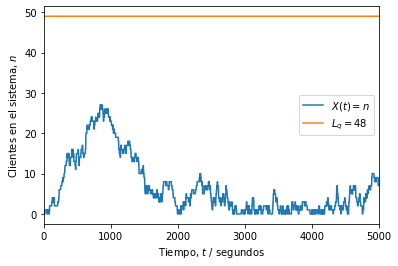

In [2]:
# Se simulará un primer caso para cuando se cumplan las condiciones.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


 

#Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos) 
nu = 0.25/60

#Número de servidores
s = 17

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu)) 
#Hay que multiplicarlo por la cantidad de servidores a utilizar

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print("Cantidad de servidores(s) = ", str(s))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

Cantidad de servidores(s) =  12
Parámetro lambda = 4.0
Parámetro nu = 0.25
Tiempo con más de 48 solicitudes en fila:
	 81.42%
	 No cumple con la especificación.
Simulación es equivalente a 5.97 horas.


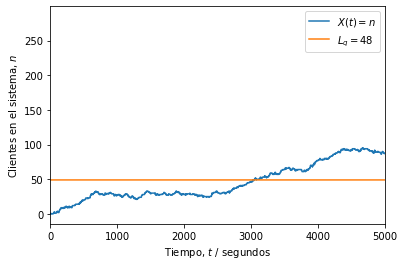

In [13]:
# Se simulará un primer caso para cuando no se cumplan las condiciones.
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


#Número de clientes
N = 1000

# Parámetro de llegada (clientes/segundos)
lam = 4/60

# Parámetro de servicio (servicios/segundos) 
nu = 0.25/60

#Número de servidores
s = 12

# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu)) 
#Hay que multiplicarlo por la cantidad de servidores a utilizar

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
    inicio = np.max((t_llegadas[i], fin))
    fin = inicio + t_servicio[i]
    t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 50

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print("Cantidad de servidores(s) = ", str(s))
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
print('\t {:0.2f}%'.format(100*fraccion))
if fraccion <= 0.05:
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 5000))
plt.show()

### Análisis de resultados

- Con una tasa de llegada de 4 personas por minuto y una tasa de servicio por cada servidor de 0.25 personas por minuto, se necesitan 17 o más servidores para lograr que el sistema no exceda las 50 personas en fila durante el 95% del tiempo de servicio.
---
- En la primera simulación, que se realizó con 17 servidores dio como resultado un máximo aproximado de 12 clientes en el sistema. A partir de lo mostrado anteriormente, se observa que el sistema no excedió las 48$\approx$50 personas (solicitudes) en fila durante el 100% del tiempo del servicio con lo que se cumplen los requerimientos.
---
- La segunda simulación demuestra lo que pasaría si se tuvieran 6 servidores menos que el mínimo necesario, es decir, si el sistema tan solo contara con 12 servidores. En los resultados de esta prueba se puede observar que no se cumplieron con los requerimientos, como era de esperarse, ya que un 81.42% del tiempo del servicio se excedieron los 48$\approx$ 50 clientes (solicitudes)  en fila. Este resultado tiene sentido tomando en cuenta que al tener una menor cantidad de servidores se atienden menos clientes y por lo tanto la cola aumenta.